# Fashion MNIST Dataset Exploration

In [1]:
# Importing necessary modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torchvision
import torchvision.transforms as transforms
import sys

from torch.utils.data import DataLoader
from fashionmnist_dataset import FashionMNISTDataset

# Image display
import matplotlib.pyplot as plt

In [2]:
# Define the transformation for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
    ])

In [3]:
# Read the training and validation datasets into DataFrames
print("Loading training data from csv file...")
train_data_df = pd.read_csv('fashion-mnist/fashion-mnist_train.csv')
print("Training data shape:", train_data_df.shape)
sys.stdout.flush()

Loading training data from csv file...
Training data shape: (60000, 785)


In [4]:
# Separate images and labels
print("Separating images and labels...")
X_train_original = train_data_df.iloc[:, 1:].values # All columns except the first (label)
y_train_original = train_data_df.iloc[:, 0].values # First column (label)
print(f"X_train shape: {X_train_original.shape}, y_train shape: {y_train_original.shape}")
sys.stdout.flush()

Separating images and labels...
X_train shape: (60000, 784), y_train shape: (60000,)


In [5]:
# Split into training and validation sets
print("Splitting data into training and validation sets...")
X_train, X_val, y_train, y_val = train_test_split(X_train_original, y_train_original, test_size=0.2, random_state=42) # 20% for validation
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
sys.stdout.flush()

Splitting data into training and validation sets...
X_train shape: (48000, 784), y_train shape: (48000,)
X_val shape: (12000, 784), y_val shape: (12000,)


In [6]:
# Define the transformation for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
    ])

In [7]:
# Load the training and validation datasets
print("Creating FashionMNIST datasets...")
train_dataset = FashionMNISTDataset(np.column_stack((y_train, X_train)), transform=transform)
validate_dataset = FashionMNISTDataset(np.column_stack((y_val, X_val)), transform=transform)

Creating FashionMNIST datasets...


In [8]:
# Create DataLoaders for the datasets
print("Creating DataLoaders for training and validation datasets...")
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validate_dataloader = DataLoader(validate_dataset, batch_size=batch_size, shuffle=False)

Creating DataLoaders for training and validation datasets...


In [9]:
# First, grab a single mini-batch of images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# print the shape of images and labels
print(images.shape, labels.shape)

torch.Size([32, 1, 28, 28]) torch.Size([32])


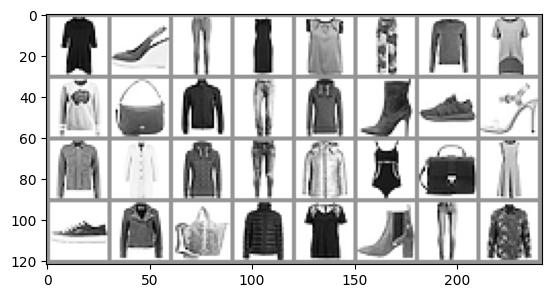

In [10]:
# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Extract a batch of images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# Create a grid from the batch of images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)